# Digit Recognizer

####

### Importing the necessary libraries

In [3]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

import matplotlib.pyplot as plt

import numpy as np

####

### Loading Dataset & Splitting Into Train - Test

In [5]:
(X, y), (X_test, y_test) = keras.datasets.mnist.load_data()

####

### Observing Characteristics

In [25]:
print("Training:", X.shape[0], "Images")
print("Testing:", X_test.shape[0], "Images")

Training: 60000 Images
Testing: 10000 Images


In [89]:
X[0].shape # The images are 28px / 28px

(28, 28)

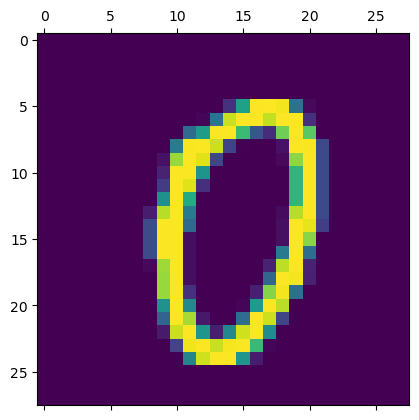

In [124]:
plt.matshow(X[1000]) # Plotting a random image

In [95]:
y[1000] # Digit in the above image

0

####

### Preprocessing Data

In [6]:
# Normalization - To change the values into a range from 0 -> 1

X = X.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
# Flattening

X_flat = X.reshape((X.shape[0], 28, 28, 1))
X_test_flat = X_test.reshape((X_test.shape[0], 28, 28, 1))

X_flat.shape

(60000, 28, 28, 1)

In [8]:
# Split data into Training & Validation Datasets

X_train, X_val, y_train, y_val = train_test_split(X_flat, y, test_size=0.2, random_state=42)

###

### Augmentation

In [9]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)

####

### Initialising Model

In [18]:
model = Sequential([
    # Output layer with 10 neurons for classification
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Flatten layer from convolutional -> dense
    Flatten(),
    
    # Hidden Layers
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    # Output layer with 10 neurons for classification
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

####

### Compiling Model

In [19]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

####

### Training Model

In [20]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=5,
    validation_data=(X_val, y_val)
)

Epoch 1/5
1500/1500 [==============================] - 137s 90ms/step - loss: 0.4263 - accuracy: 0.8642 - val_loss: 0.0689 - val_accuracy: 0.9770
Epoch 2/5
1500/1500 [==============================] - 134s 89ms/step - loss: 0.1557 - accuracy: 0.9543 - val_loss: 0.0412 - val_accuracy: 0.9882
Epoch 3/5
1500/1500 [==============================] - 135s 90ms/step - loss: 0.1168 - accuracy: 0.9667 - val_loss: 0.0387 - val_accuracy: 0.9884
Epoch 4/5
1500/1500 [==============================] - 136s 91ms/step - loss: 0.1000 - accuracy: 0.9711 - val_loss: 0.0322 - val_accuracy: 0.9902
Epoch 5/5
1500/1500 [==============================] - 133s 89ms/step - loss: 0.0861 - accuracy: 0.9757 - val_loss: 0.0281 - val_accuracy: 0.9923


####

### Testing Model Accuracy

In [21]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 11s 32ms/step - loss: 0.0260 - accuracy: 0.9913


[0.026023300364613533, 0.9912999868392944]

### ~ 99% Accuracy on both Train - Test Data

### It suggests that the model generalizes well to unseen data and has learned to identify patterns

###

### Saving Model

In [24]:
model.save('mnist_model')

INFO:tensorflow:Assets written to: mnist_model\assets


INFO:tensorflow:Assets written to: mnist_model\assets


In [4]:
loaded_model = load_model('mnist_model')

###

## Comparision

######

### Training vs Validation Accuracy

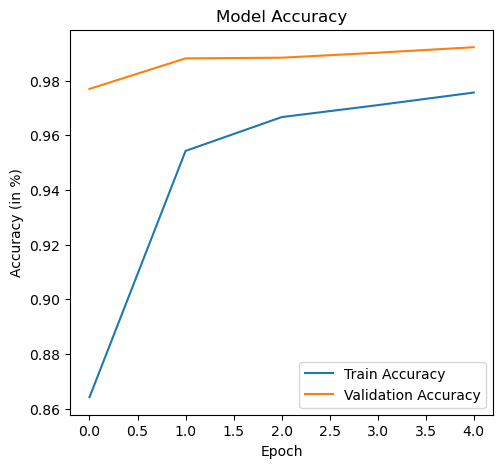

In [41]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (in %)')
plt.legend()

###

### Training vs Validation Loss

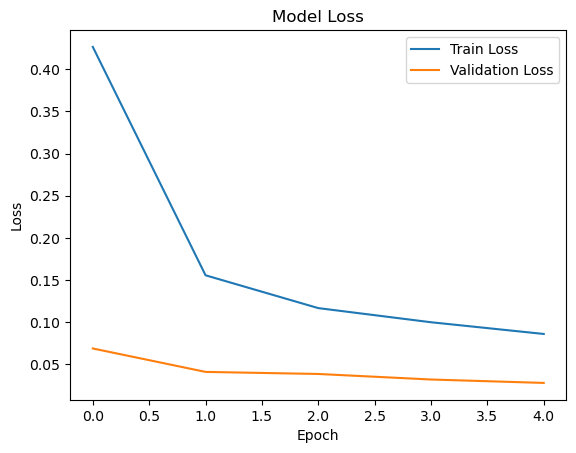

In [42]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

####

## Thank You!